In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!pip install --upgrade google-colab


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.3 MB/s eta 0:00:00


In [11]:
import pandas as pd
import os
import numpy as np

# LETTURA DATI TRAINING

In [16]:
def leggi_dati_lista(nome_cartella):
  lista = []
  for filename in os.listdir(nome_cartella):
    # Costruisci il percorso completo del file
    percorso_file = os.path.join(nome_cartella, filename)

    # Leggi solo la terza colonna del file CSV in un DataFrame e assegna un nome dinamico
    df= pd.read_csv(percorso_file, usecols=[0])

    lista.append(df["acc_X"].values)

  return lista

In [17]:
cartella_train_0 = r'/content/drive/MyDrive/Progetto_manutenzione/file_cut_training/Pitting_degradation_level_0 (Healthy)'
cartella_train_1 = r'/content/drive/MyDrive/Progetto_manutenzione/file_cut_training/Pitting_degradation_level_1'
cartella_train_2 = r'/content/drive/MyDrive/Progetto_manutenzione/file_cut_training/Pitting_degradation_level_2'
cartella_train_3 = r'/content/drive/MyDrive/Progetto_manutenzione/file_cut_training/Pitting_degradation_level_3'
cartella_train_4 = r'/content/drive/MyDrive/Progetto_manutenzione/file_cut_training/Pitting_degradation_level_4'
cartella_train_5 = r'/content/drive/MyDrive/Progetto_manutenzione/file_cut_training/Pitting_degradation_level_5'
cartella_train_6 = r'/content/drive/MyDrive/Progetto_manutenzione/file_cut_training/Pitting_degradation_level_6'

In [18]:
x_train_list_0 = leggi_dati_lista(cartella_train_0)
x_train_list_1 = leggi_dati_lista(cartella_train_1)
x_train_list_2 = leggi_dati_lista(cartella_train_2)
x_train_list_3 = leggi_dati_lista(cartella_train_3)
x_train_list_4 = leggi_dati_lista(cartella_train_4)
x_train_list_5 = leggi_dati_lista(cartella_train_5)
x_train_list_6 = leggi_dati_lista(cartella_train_6)

print('Dati classe 0: ' + str(len(x_train_list_0)))
print('Dati classe 1: ' + str(len(x_train_list_0)))
print('Dati classe 2: ' + str(len(x_train_list_0)))
print('Dati classe 3: ' + str(len(x_train_list_0)))
print('Dati classe 4: ' + str(len(x_train_list_0)))
print('Dati classe 5: ' + str(len(x_train_list_0)))
print('Dati classe 6: ' + str(len(x_train_list_0)))

Dati classe 0: 0
Dati classe 1: 0
Dati classe 2: 0
Dati classe 3: 0
Dati classe 4: 0
Dati classe 5: 0
Dati classe 6: 0


In [19]:
# Creo lista di tutti i dati di train ignorando le classi 3 e 6
x_train_list = x_train_list_0 + x_train_list_1 + x_train_list_2 + x_train_list_4 + x_train_list_5
x_train = np.asarray(x_train_list)

In [20]:
lista_etichette_train = []

# Creo la lista  delle erichette di train ignorando le etichette dei dati di classe 3 e 6

lista_etichette_train.extend([0] * len(x_train_list_0))
lista_etichette_train.extend([1] * len(x_train_list_1))
lista_etichette_train.extend([2] * len(x_train_list_2))
#lista_etichette_train.extend([3] * len(x_train_list_3))
lista_etichette_train.extend([3] * len(x_train_list_4)) # etichetta 3 significa 4
lista_etichette_train.extend([4] * len(x_train_list_5)) # etichetta 4 significa 5
#lista_etichette_train.extend([6] * len(x_train_list_6))

print('Numero dati totali train: ' + str(len(lista_etichette_train)))

Numero dati totali train: 4111


In [21]:
y_train_integer = np.asarray(lista_etichette_train)
y_train = tf.keras.utils.to_categorical(y_train_integer)

# MODELLO E TRAINING CNN

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, SeparableConv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Add
import tensorflow as tf

# Input Layer
input_layer = Input(shape=(20000, 1))

# Separable_Conv1D_1
conv1 =  SeparableConv1D(32, kernel_size=3, strides=1, padding='same', activation='relu')(input_layer)
conv1_mp = MaxPooling1D(pool_size=2, padding='same')(conv1)

# Separable_Conv1D_2
conv2 =  SeparableConv1D(64, kernel_size=3, strides=1, padding='same', activation='relu')(conv1_mp)
conv2_mp = MaxPooling1D(pool_size=2, padding='same')(conv2)

# Separable_Conv1D_3
conv3 =  SeparableConv1D(64, kernel_size=3, strides=4, padding='same', activation='relu')(input_layer)

# Residual Layer 1
residual1 = Add()([conv2_mp, conv3])


# Residual Layer 2
sep_conv_4 = SeparableConv1D(128, kernel_size=3, activation='relu', padding='same')(residual1)
sep_conv_5 = SeparableConv1D(128, kernel_size=3, activation='relu', padding='same')(sep_conv_4)
sep_conv6 = SeparableConv1D(128, kernel_size=3, strides=4, activation='relu', padding='same')(input_layer)
residual2= Add()([sep_conv_5, sep_conv6])


# Global Max Pooling
global_max_pooling = GlobalMaxPooling1D()(residual2)

# Dense Layer
dense_layer = Dense(100, activation='relu')(global_max_pooling)

# Softmax Layer
softmax_layer = Dense(5, activation='softmax')(dense_layer)

# Creazione del modello
model = Model(inputs=input_layer, outputs=softmax_layer)


optimizer = tf.keras.optimizers.experimental.RMSprop(
    learning_rate=0.002,
    rho=0.9,
    momentum=0.0,
    epsilon=1e-07
)
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=[tf.keras.metrics.CategoricalAccuracy()]
)

# Visualizzazione della struttura della rete
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 20000, 1)]           0         []                            
                                                                                                  
 separable_conv1d_6 (Separa  (None, 20000, 32)            67        ['input_2[0][0]']             
 bleConv1D)                                                                                       
                                                                                                  
 max_pooling1d_2 (MaxPoolin  (None, 10000, 32)            0         ['separable_conv1d_6[0][0]']  
 g1D)                                                                                             
                                                                                            

In [ ]:
model.fit(x_train,y_train, epochs=60)

Epoch 1/20
259/259 [==============================] - 18s 69ms/step - loss: 0.1273 - categorical_accuracy: 0.9552
Epoch 2/20
259/259 [==============================] - 19s 73ms/step - loss: 0.1238 - categorical_accuracy: 0.9560
Epoch 3/20
259/259 [==============================] - 19s 73ms/step - loss: 0.1244 - categorical_accuracy: 0.9537
Epoch 4/20
259/259 [==============================] - 19s 72ms/step - loss: 0.1291 - categorical_accuracy: 0.9552
Epoch 5/20
259/259 [==============================] - 19s 72ms/step - loss: 0.1176 - categorical_accuracy: 0.9589
Epoch 6/20
259/259 [==============================] - 19s 72ms/step - loss: 0.1192 - categorical_accuracy: 0.9587
Epoch 7/20
259/259 [==============================] - 18s 69ms/step - loss: 0.1090 - categorical_accuracy: 0.9606
Epoch 8/20
259/259 [==============================] - 18s 70ms/step - loss: 0.1073 - categorical_accuracy: 0.9618
Epoch 9/20
259/259 [==============================] - 19s 73ms/step - loss: 0.1045 - cat

# LETTURA DATI TEST

In [ ]:
cartella_test_0 = r'/content/drive/MyDrive/Progetto_manutenzione/hold_out_test/Pitting_degradation_level_0 (Healthy)'
cartella_test_1 = r'/content/drive/MyDrive/Progetto_manutenzione/hold_out_test/Pitting_degradation_level_1'
cartella_test_2 = r'/content/drive/MyDrive/Progetto_manutenzione/hold_out_test/Pitting_degradation_level_2'
cartella_test_3 = r'/content/drive/MyDrive/Progetto_manutenzione/hold_out_test/Pitting_degradation_level_3'
cartella_test_4 = r'/content/drive/MyDrive/Progetto_manutenzione/hold_out_test/Pitting_degradation_level_4'
cartella_test_5 = r'/content/drive/MyDrive/Progetto_manutenzione/hold_out_test/Pitting_degradation_level_5'
cartella_test_6 = r'/content/drive/MyDrive/Progetto_manutenzione/hold_out_test/Pitting_degradation_level_6'

In [ ]:
x_test_list_0 = leggi_dati_lista(cartella_test_0)
x_test_list_1 = leggi_dati_lista(cartella_test_1)
x_test_list_2 = leggi_dati_lista(cartella_test_2)
x_test_list_3 = leggi_dati_lista(cartella_test_3)
x_test_list_4 = leggi_dati_lista(cartella_test_4)
x_test_list_5 = leggi_dati_lista(cartella_test_5)
x_test_list_6 = leggi_dati_lista(cartella_test_6)

print('DATI DI TEST')
print('Dati classe 0: ' + str(len(x_test_list_0)))
print('Dati classe 1: ' + str(len(x_test_list_1)))
print('Dati classe 2: ' + str(len(x_test_list_2)))
print('Dati classe 3 (ignorati): ' + str(len(x_test_list_3)))
print('Dati classe 4 (etichetta 3): ' + str(len(x_test_list_4)))
print('Dati classe 5 (etichetta 4): ' + str(len(x_test_list_5)))
print('Dati classe 6 (ignorati): ' + str(len(x_test_list_6)))

DATI DI TEST
Dati classe 0: 161
Dati classe 1: 157
Dati classe 2: 166
Dati classe 3 (ignorati): 173
Dati classe 4 (etichetta 3): 156
Dati classe 5 (etichetta 4): 156
Dati classe 6 (ignorati): 156


In [ ]:
# Creo lista di tutti i dati di test ignorando le classi 3 e 6
x_test_list = x_test_list_0 + x_test_list_1 + x_test_list_2 + x_test_list_4 + x_test_list_5
x_test = np.asarray(x_test_list)

In [ ]:
print('Numero dati test utilizzati: ' + str(len(x_test_list)))

Numero dati test utilizzati: 796


In [ ]:
lista_etichette_test = []

# Creo la lista  delle erichette di train ignorando le etichette dei dati di classe 3 e 6

lista_etichette_test.extend([0] * len(x_test_list_0))
lista_etichette_test.extend([1] * len(x_test_list_1))
lista_etichette_test.extend([2] * len(x_test_list_2))
#lista_etichette_test.extend([3] * len(x_test_list_3))
lista_etichette_test.extend([3] * len(x_test_list_4)) # etichetta 3 significa 4
lista_etichette_test.extend([4] * len(x_test_list_5)) # etichetta 4 significa 5
#lista_etichette_test.extend([6] * len(x_test_list_6))

print('Numero dati totali test: ' + str(len(lista_etichette_test)))

y_test_integer = np.asarray(lista_etichette_test)
y_test = tf.keras.utils.to_categorical(y_test_integer)

Numero dati totali test: 796


# TEST DEL MODELLO CNN

In [ ]:
evaluation = model.evaluate(x_test, y_test)
print(evaluation)

25/25 [==============================] - 1s 31ms/step - loss: 0.3537 - categorical_accuracy: 0.9121
[0.35367730259895325, 0.9120603203773499]


In [ ]:
prediction = model.predict(x_test)

25/25 [==============================] - 1s 27ms/step


In [ ]:
# Trova l'indice della classe con la probabilità più alta per ciascun vettore di probabilità
indici_classi_predette = np.argmax(prediction, axis=1)
# Crea la matrice one-hot
matrice_one_hot = np.eye(prediction.shape[1])[indici_classi_predette]

from sklearn.metrics import precision_score, recall_score
print(precision_score(y_test,matrice_one_hot, average='macro'))
print(recall_score(y_test,matrice_one_hot, average='macro'))

0.9183825896325896
0.911492855026669


In [ ]:
from sklearn.metrics import confusion_matrix
# Converte la matrice one-hot in etichette predette
etichette_predette = np.argmax(matrice_one_hot, axis=1)

# Converte y_test in etichette reali
etichette_reali = np.argmax(y_test, axis=1)

# Calcola la matrice di confusione
matrice_confusione = confusion_matrix(etichette_reali, etichette_predette)

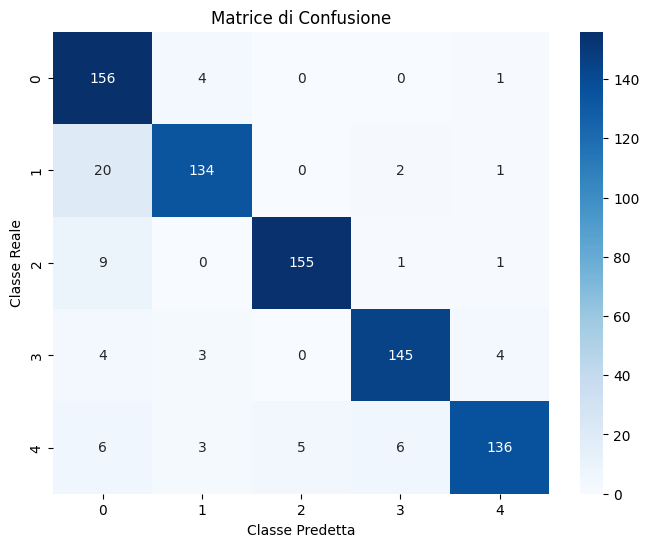

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot della matrice di confusione utilizzando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matrice_confusione, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Classe Predetta')
plt.ylabel('Classe Reale')
plt.title('Matrice di Confusione')
plt.show()


In [ ]:
model.save_weights('CNN.h5')

# TEST CON TUTTI LE CLASSI

In [ ]:
# Creo le x di test prendendo i dati di tutte le classi
x_test_list_all = x_test_list_0 + x_test_list_1 + x_test_list_2 + x_test_list_3 + x_test_list_4 + x_test_list_5 + x_test_list_6
x_test_all = np.asarray(x_test_list_all)

In [ ]:
print('Numero dati test totali: ' + str(len(x_test_list_all)))

Numero dati test totali: 1125


In [ ]:
predizioni_per_tutte_le_classi = model.predict(x_test_all)

36/36 [==============================] - 1s 34ms/step


In [ ]:
np.savetxt('predizioni_dati_test.csv', predizioni_per_tutte_le_classi, delimiter=',')

In [ ]:
my_data = np.genfromtxt('/content/predizioni_dati_test.csv', delimiter=',')

In [ ]:
print(my_data.shape)

(1125, 5)


# TRAFORMATA DI FOURIER

In [22]:
#numero di campioni acquisiti al secondo
sample_rate = 20480

def minmax_norm(df_input):
    return (df_input - df_input.min()) / (df_input.max() - df_input.min())

# Input sotto forma di array numpy
def trasf_fourier(dataframe):
    trasformata_fourier = np.fft.fft(dataframe)
    frequencies = np.fft.fftfreq(len(trasformata_fourier), d=1/sample_rate)
    ampiezze_importanti = np.abs(trasformata_fourier)
    prime_1000_frequenze = frequencies[np.argsort(ampiezze_importanti)[:1000]]
    prime_1000_frequenze_norm = minmax_norm(prime_1000_frequenze)
    return prime_1000_frequenze_norm

In [23]:
ft_train_list = []
for vettore in x_train:
  ft_train_list.append(trasf_fourier(vettore))

ft_train = np.asarray(ft_train_list)

In [ ]:
print(ft_train.shape)

(8264, 1000)


# MODELLO E TRAINING AUTOENCODER

In [28]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import regularizers

# Definizione dei parametri
input_dim = 1000
hidden1_dim = 300
hidden2_dim = 200
hidden3_dim = 50
learning_rate = 0.01
sparsity_target = 0.15
sparsity_weight = 3
weight_regularization = 0.001
num_epochs = 100
batch_size = 128

# Funzione per calcolare la sparsity loss
def sparsity_loss(avg_activation, sparsity_target, sparsity_weight):
    kl_divergence = tf.reduce_sum(
        sparsity_target * tf.math.log(sparsity_target / avg_activation) +
        (1 - sparsity_target) * tf.math.log((1 - sparsity_target) / (1 - avg_activation))
    )
    return sparsity_weight * kl_divergence

# Funzione per calcolare la loss totale dell'autoencoder
def total_loss(y_true, y_pred, avg_activation):
    reconstruction_loss = tf.reduce_mean(tf.square(y_true - y_pred))
    reg_loss = sum(autoencoder.losses)
    sparse_loss = sparsity_loss(avg_activation, sparsity_target, sparsity_weight)
    return reconstruction_loss + reg_loss + sparse_loss

# Definizione dell'encoder
encoder_input = Input(shape=(input_dim,))
encoder_output = Dense(hidden1_dim, activation='sigmoid', kernel_regularizer=regularizers.l2(weight_regularization))(encoder_input)
encoder_output = Dense(hidden2_dim, activation='sigmoid', kernel_regularizer=regularizers.l2(weight_regularization))(encoder_output)
encoder_output = Dense(hidden3_dim, activation='sigmoid', kernel_regularizer=regularizers.l2(weight_regularization))(encoder_output)

# Definizione del decoder
decoder_input = Input(shape=(hidden3_dim,))
decoder_output = Dense(hidden2_dim, activation='sigmoid', kernel_regularizer=regularizers.l2(weight_regularization))(decoder_input)
decoder_output = Dense(hidden1_dim, activation='sigmoid', kernel_regularizer=regularizers.l2(weight_regularization))(decoder_output)
decoder_output = Dense(input_dim, activation='sigmoid', kernel_regularizer=regularizers.l2(weight_regularization))(decoder_output)

# Creazione dei modelli
encoder_model = Model(encoder_input, encoder_output, name='encoder')
decoder_model = Model(decoder_input, decoder_output, name='decoder')

# Costruzione dell'autoencoder
autoencoder_input = Input(shape=(input_dim,))
encoded = encoder_model(autoencoder_input)
decoded = decoder_model(encoded)
autoencoder = Model(autoencoder_input, decoded, name='autoencoder')

# Calcolo dell'attivazione media per la sparsity loss
avg_activation = tf.reduce_mean(encoded, axis=0)

# Compilazione dell'autoencoder
autoencoder.compile(optimizer='adam', loss=lambda y_true, y_pred: total_loss(y_true, y_pred, avg_activation), experimental_run_tf_function=False)



In [29]:
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 1000)]            0         
                                                                 
 encoder (Functional)        (None, 50)                370550    
                                                                 
 decoder (Functional)        (None, 1000)              371500    
                                                                 
Total params: 742050 (2.83 MB)
Trainable params: 742050 (2.83 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow.python.framework.ops import disable_eager_execution

disable_eager_execution()

In [30]:
# Addestramento dell'autoencoder
with tf.compat.v1.Session() as sess:
    sess.run(tf.compat.v1.global_variables_initializer())
    for epoch in range(num_epochs):
        _, loss = sess.run([optimizer, total_loss], feed_dict={autoencoder_input: ft_train})
        print("Epoch:", epoch + 1, "Loss:", loss)


NameError: name 'optimizer' is not defined

In [ ]:
# Codifica dei dati di input
encoded_data = encoder_model.predict(input_example)

print("Encoded data shape:", encoded_data.shape)

#Modello e training autoencoder CARLO

In [35]:
#MODELLO CARLO
import tensorflow as tf

# Definizione dei parametri
input_size = 1000
hidden1_size = 300
hidden2_size = 200
hidden3_size = 50

# Definizione della rete
class SparseAutoencoder(tf.keras.Model):
    def __init__(self):
        super(SparseAutoencoder, self).__init__()
        self.encoder = tf.keras.Sequential([
            tf.keras.layers.Dense(hidden1_size, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
            tf.keras.layers.Dense(hidden2_size, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
            tf.keras.layers.Dense(hidden3_size, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))
        ])
        self.decoder = tf.keras.Sequential([
            tf.keras.layers.Dense(hidden2_size, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
            tf.keras.layers.Dense(hidden1_size, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
            tf.keras.layers.Dense(input_size, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(0.001))
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Definizione degli iperparametri
sparsity_target = 0.15
sparsity_weight = 3
learning_rate = 0.001
#impostato a mano
weight_regularization = 0.001

def sparse_autoencoder_loss(x, decoded_output):
    encoded_output = autoencoder.encoder(x)  # Chiamata all'encoder per ottenere encoded_output
    reconstruction_loss = tf.reduce_mean(tf.square(x - decoded_output))
    sparsity_loss = tf.reduce_mean(sparsity_weight * (sparsity_target * tf.math.log(sparsity_target / tf.reduce_mean(encoded_output)) + (1 - sparsity_target) * tf.math.log((1 - sparsity_target) / (1 - tf.reduce_mean(encoded_output)))))
    total_loss = reconstruction_loss + sparsity_loss
    return total_loss


# Creazione del modello
autoencoder = SparseAutoencoder()
# Compilazione del modello
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss=sparse_autoencoder_loss)

In [36]:
autoencoder.build((None, input_size))  # Specifica la forma dell'input

In [37]:
autoencoder.summary()

Model: "sparse_autoencoder_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 50)                370550    
                                                                 
 sequential_3 (Sequential)   (None, 1000)              371500    
                                                                 
Total params: 742050 (2.83 MB)
Trainable params: 742050 (2.83 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
autoencoder.fit(ft_train, ft_train, epochs=num_epochs, batch_size=batch_size)

Epoch 1/100
33/33 [==============================] - 2s 5ms/step - loss: 1.2613
Epoch 2/100
33/33 [==============================] - 0s 5ms/step - loss: 0.6903
Epoch 3/100
33/33 [==============================] - 0s 5ms/step - loss: 0.4693
Epoch 4/100
33/33 [==============================] - 0s 5ms/step - loss: 0.3635
Epoch 5/100
33/33 [==============================] - 0s 5ms/step - loss: 0.3012
Epoch 6/100
33/33 [==============================] - 0s 5ms/step - loss: 0.2596
Epoch 7/100
33/33 [==============================] - 0s 5ms/step - loss: 0.2300
Epoch 8/100
33/33 [==============================] - 0s 5ms/step - loss: 0.2079
Epoch 9/100
33/33 [==============================] - 0s 5ms/step - loss: 0.1910
Epoch 10/100
33/33 [==============================] - 0s 5ms/step - loss: 0.1780
Epoch 11/100
33/33 [==============================] - 0s 5ms/step - loss: 0.1679
Epoch 12/100
33/33 [==============================] - 0s 5ms/step - loss: 0.1599
Epoch 13/100
33/33 [=================

In [39]:
# Codifica dei dati di input
encoded_data = autoencoder.encoder(ft_train)


print("Encoded data shape:", encoded_data.shape)

Encoded data shape: (4111, 50)


In [41]:
print(encoded_data)

tf.Tensor(
[[0.         0.         0.4393323  ... 0.         0.         0.1240223 ]
 [0.         0.         0.4393323  ... 0.         0.         0.1240223 ]
 [0.         0.         0.4393323  ... 0.         0.         0.12402231]
 ...
 [0.         0.         0.4393323  ... 0.         0.         0.1240223 ]
 [0.         0.         0.4393323  ... 0.         0.         0.1240223 ]
 [0.         0.         0.4393323  ... 0.         0.         0.1240223 ]], shape=(4111, 50), dtype=float32)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [44]:
#qui ci sono i vettori di dimensione 50 da passare al cluster
lista_per_cluster = []

for item in encoded_data:
  lista_per_cluster.append(np.array(item))

print(lista_per_cluster[:50])

[array([0.        , 0.        , 0.4393323 , 0.        , 0.13938332,
       0.        , 0.56846535, 0.55404997, 0.        , 0.5074528 ,
       0.        , 0.        , 0.24277182, 0.1291716 , 0.        ,
       0.5184134 , 0.13271734, 0.        , 0.43095958, 0.15816858,
       0.        , 0.        , 0.        , 0.44706506, 0.6179129 ,
       0.3179261 , 0.        , 0.35426667, 0.14895745, 0.        ,
       0.        , 0.13787651, 0.2137199 , 0.1278868 , 0.        ,
       0.        , 0.        , 0.        , 0.1355651 , 0.        ,
       0.15149185, 0.        , 0.5655031 , 0.        , 0.        ,
       0.        , 0.31301662, 0.        , 0.        , 0.1240223 ],
      dtype=float32), array([0.        , 0.        , 0.4393323 , 0.        , 0.13938332,
       0.        , 0.56846535, 0.55404997, 0.        , 0.5074528 ,
       0.        , 0.        , 0.24277182, 0.1291716 , 0.        ,
       0.5184134 , 0.13271734, 0.        , 0.43095958, 0.15816858,
       0.        , 0.        , 0.     